# Homework 5: Machine Reading

## 1. Random QA

1) What is the probability $p_{k,n}$ that our random QA system will output an answer with $k$ tokens when given a context paragraph with $n$ token as input?

$$p_{k,n} = \frac{2\times(n-k+1)}{n\times(n+1)}$$

2) For a fixed $n$ of $100$, produce a plot of $p_{k,n}$ and $\hat{p}_{k,n}$  vs $k$. Design a monte-carlo experiment to estimate the values for $\hat{p}_{k,n}$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def p_k_n(k, n):
    #implement answer from part 1 here
    p_k_n = 2*(n-k+1)/(n*(n+1))
    return p_k_n

In [0]:
def monte_carlo_p_k_n(k, n, T = int(1e5)):
    success = 0
    for i in range(T):
      while True:
        start = np.random.randint(1,n+1)
        end = np.random.randint(1,n+1)
        if end >= start:
          if end - start + 1 == k:
            success += 1
          break
    return success/T

In [0]:
k_array = np.arange(1, 100, 5)
p_k_n_hat = [monte_carlo_p_k_n(k, n=100, T = int(1e5)) for k in k_array]
p_k_n = [p_k_n(k, n=100) for k in k_array]

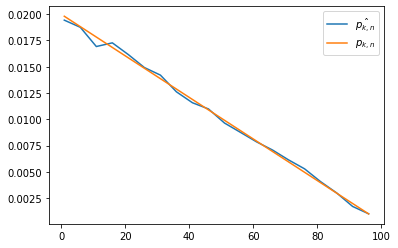

In [9]:
plt.plot(k_array, p_k_n_hat, label = r'$\hat{p_{k,n}}$')
plt.plot(k_array, p_k_n, label = r'$p_{k, n}$')
plt.legend()

3) Calculate the expected length of the answer given by your random QA system. i,e write an expression for $L_n = E[K]$ (It's fine to leave it as a summation).

$$ L_n = \frac{2}{n\times(n+1)}\sum_{i=1}^{n}i\times(n+1-i)$$

4) Plot $\hat{L_n}$ estimated through monte-carlo simulations and $L_n$ for $n = 5, 10, 25, 50, 100, 250$ and $500$.

In [0]:
def L_n(n):
    #implement answer from above
    array = np.arange(1,n+1)
    l_n = sum(array*(n+1-array))*2/(n*(n+1))
    return l_n

def monte_carlo_L_n(n, T = int(1e5)):
    #T is the number of times you run experiment
    total = 0
    for i in range(T):
      while True:
        start = np.random.randint(1,n+1)
        end = np.random.randint(1,n+1)
        if end >= start:
          total += end - start + 1
          break
    return total/T

In [0]:
n_array = [5, 10, 25, 50, 100, 250, 500]
l_n_hat = [monte_carlo_L_n(n, T = int(1e5)) for n in n_array]
l_n = [L_n( n) for n in n_array]

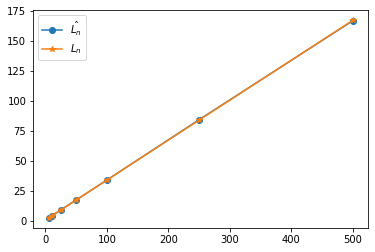

In [12]:
plt.plot(n_array, l_n_hat, '-o', label = r'$\hat{L_n}$')
plt.plot(n_array, l_n,  '-*', label = r'$L_n$')
plt.legend()

5) Calculate the probability, $p_n$ that Random QA system outputs the correct answer to your question. 

$$p_n = \frac{2}{n\times(n+1)}$$

6)  In SQuAD 2.0 data set, the answer for your question can either lie within the context paragraph or there could be no answer within the given paragraph. Let $\alpha$ represent the fraction of questions for which the answer \textbf{does not} lie within the paragraph.

In [0]:
def estimate_alpha(data_loader):
  no_answer = 0
  total = 0
  for batch in data_loader:
    cw_idxs, cc_idxs, qw_idxs, qc_idxs, y1, y2, ids = batch
    no_answer += sum(y1 == 0).item()
    total += y1.size(-1)    
  return no_answer/total

In [13]:
## load dataset and call function to find alpha
! git clone https://github.com/williamFalcon/squad.git

Cloning into 'squad'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 47 (delta 5), reused 3 (delta 0), pack-reused 33
Unpacking objects: 100% (47/47), done.


In [14]:
! cd squad/ && git pull

Already up to date.


In [15]:
! ls squad

args.py  environment.yml  LICENSE    README.md	setup.py  train.py
data	 layers.py	  models.py  save	test.py   util.py


In [16]:
! pip install ujson

     |████████████████████████████████| 194kB 2.8MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68033 sha256=c770a4b04ad6c8fd381b82c8d862de2474368a3838bc581bdae692a58d513c20
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [17]:
! cd squad/ && python setup.py

glove.840B.300d.zip: 2.18GB [17:01, 2.13MB/s]                
Unzipping GloVe word vectors...
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
Pre-processing train examples...
100% 442/442 [01:33<00:00,  3.95it/s]
130319 questions in total
Pre-processing word vectors...
2196018it [02:55, 12512.31it/s]                 
88744 / 107454 tokens have corresponding word embedding vector
Pre-processing char vectors...
1374 tokens have corresponding char embedding vector
Pre-processing dev examples...
100% 16/16 [00:03<00:00,  4.04it/s]
6078 questions in total
Converting train examples to indices...
130319it [00:41, 3177.16it/s]
tcmalloc: large alloc 3326009344 bytes == 0x137ec6000 @  0x7ff72823c1e7 0x7ff725d1bf71 0x7ff725d7f55d 0x7ff725d82e28 0x7ff725d833e5 0x7ff725e1

In [0]:
import numpy.random as random
seed = 224
random.seed(seed)
import torch
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [0]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as sched
import torch.utils.data as data

from squad.util import collate_fn, SQuAD
from collections import OrderedDict
from json import dumps
from tqdm import tqdm
from ujson import load as json_load
#import pytorch_lightning as pl

from squad import layers, util
import os

DIR = os.getcwd()

In [0]:
train_path = os.path.join(DIR, 'squad/data/train.npz')
train_loader = data.DataLoader(SQuAD(train_path),
                               batch_size=64,
                               shuffle=True,
                               drop_last=True,
                               collate_fn=collate_fn)
dev_path = os.path.join(DIR, 'squad/data/dev.npz')
dev_loader = data.DataLoader(SQuAD(dev_path),
                               batch_size=64,
                               shuffle=True,
                               drop_last=True,
                               collate_fn=collate_fn)
test_path = os.path.join(DIR, 'squad/data/test.npz')
test_loader = data.DataLoader(SQuAD(test_path),
                               batch_size=64,
                               shuffle=True,
                               drop_last=True,
                               collate_fn=collate_fn)

In [24]:
print("alpha: ",estimate_alpha(train_loader))

alpha:  0.33364378078817736


In [0]:
alpha = estimate_alpha(train_loader)

In [0]:
## implement random QA model
## load dataset 
## find F1 and EM on Dev Set

dev_dataset = SQuAD(dev_path)

f1_list = []
em_list = []

for i in range(100):
  f1 = 0.0
  em = 0.0
  for cw_idxs, cc_idxs, qw_idxs, qc_idxs, y1, y2, ids in dev_dataset:
    real_len = sum(cw_idxs != 0).item()
    test = np.random.rand()
    if test <= alpha:
      if y1.item() == 0:
        f1 += 1
        em += 1
    else:
      if y1.item() != 0 and y2.item() != 0:
        while True:
          start_idx = np.random.randint(0,real_len)
          end_idx = np.random.randint(0,real_len)
          if end_idx >= start_idx:
            preds_ids = cw_idxs[start_idx:end_idx+1].tolist()
            preds = " ".join([str(id) for id in preds_ids])
            answer_ids = cw_idxs[y1.item():y2.item()+1].tolist()
            answer = " ".join([str(id) for id in answer_ids])
            f1 += util.compute_f1(answer,preds)
            em += util.compute_em(answer,preds)
            break

  f1_score = f1/len(dev_dataset)
  em_score = em/len(dev_dataset)  
  f1_list.append(f1_score)
  em_list.append(em_score)

In [95]:
print("mean F1: ",np.mean(f1_list))
print("F1 std: ", np.std(f1_list))
print("mean EM: ",np.mean(em_list))
print("EN std: ", np.std(em_list))

mean F1:  0.19437271637320086
F1 std:  0.004545101980597696
mean EM:  0.1739842043354058
EN std:  0.004468749038454429


##### F1 Score on Dev Set:
##### EM on Dev Set: 